HW12

In [9]:
from scipy.optimize import curve_fit
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('3_4_Thermocouple Calibration_Data.csv', delimiter=',')
xdata = data['x (degree)']; ydata = data['y (V)']; sigma = data['sigma (V)']
result = linregress(xdata,ydata)
slope = result[0]; intercept = result[1]; 

In [11]:
def func(x,a,b,c):
    return a*x**2+b*x+c

popt, pcov = curve_fit(func, xdata, ydata, absolute_sigma=True, sigma= sigma, p0 = [0,slope, intercept])
err = np.sqrt(np.diag(pcov))
yval = func(xdata, popt[0], popt[1], popt[2])
error = err[0]*xdata**2+err[1]*xdata+err[2]




Text(60, 0.3, 'start function: y = 0.043T+-1')

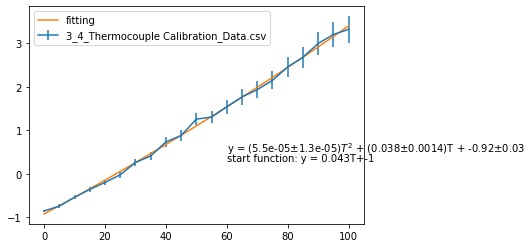

In [12]:
plt.errorbar(xdata, ydata,yerr=error, label = "3_4_Thermocouple Calibration_Data.csv")
plt.plot(xdata, yval, label = 'fitting')
plt.legend()
plt.text(60,0.5, f'y = ({popt[0]:.2g}$\pm${err[0]:.2g}$)T^2$ + ({popt[1]:.2g}$\pm${err[1]:.2g})T + {popt[2]:.2g}$\pm${err[2]:.2g}')
plt.text(60,0.3, f'start function: y = {slope:.2g}T+{intercept:.2g}')

HW13

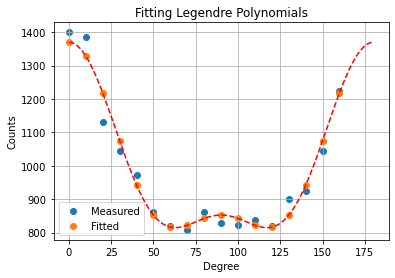

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import legendre
df = pd.read_csv('3_6_Legendre Polynomial Fit_data.csv')
df = df.iloc[0:17]
df['cos_Theta'] = np.cos(np.deg2rad(df['Theta']))
c,stats = legendre.legfit(df['cos_Theta'], df['Counts'],[0,2,4], full=True)

plt.title('Fitting Legendre Polynomials')
plt.xlabel('Degree')
plt.ylabel('Counts')

x = df['Theta']
y_measured = df['Counts']
plt.scatter(x,y_measured, label = 'Measured')
y_fitted = legendre.Legendre(c)(df['cos_Theta'])
plt.scatter(x,y_fitted, label = 'Fitted')
x_fit = np.linspace(0,180,181)
y_fit = legendre.Legendre(c)(np.cos(np.deg2rad(x_fit)))
plt.plot(x_fit, y_fit, 'r--')

plt.grid()
plt.legend()
plt.show()

In [19]:
print(c)
print(stats)

[907.35130839   0.         260.77934509   0.         201.72627545]
[array([19266.65634076]), 3, array([1.31261621, 0.88332116, 0.70482792]), 3.774758283725532e-15]


1. 두 결과가 서로 다른 이유를 유추해 보시오.

Legendre polynomial의 1차항이 엑셀의 경우 907.1746679이었고, 파이썬의 경우 907.35130839인 것을 알 수 있다. 만약 1차항의 계수가 같았다면 르장드르 함수는 orthogonal하기 때문에 2차, 3차항의 계수가 비슷하게 나왔을 것 같은데 1차항에서 작은 오차가 있어 2차, 3차항의 차이를 낸 것 같다.

② 유추한 결과를 바탕으로 수정된 python code를 작성하고 spreadsheet과의 결과와 비교하여 보시오.